In [1]:
import matplotlib.pyplot as plt
import numpy as np

#函数定义
def train_lr(iter_max, theta, eta, a, y):
    i = 0
    for i in range(iter_max):
        result = a.dot(y)
        sum_y = np.array([0, 0, 0])
        if (len(np.argwhere(result <= 0)) > 0):
            for j in range(len(np.argwhere(result <= 0))):
                sum_y = sum_y + eta * y[:, np.argwhere(result <= 0)[j][0]]
        else:
            break
        if (abs(np.sum(sum_y)) < theta):
            break
        else:
            a = a + sum_y
    return (i+1, a)


def train_hk(iter_max, eta, a, b, y):
    a = a.reshape((3, 1))
    i = 0
    for i in range(iter_max):
        e = y.dot(a) - b
        e1 = 0.5 * (e + np.abs(e))
        b = b + 2 * eta * e1
        a = np.linalg.pinv(y).dot(b)
        if (abs(e).max() <= b.min()):
            break
    print('acc:', 1 - len(np.argwhere(y.dot(a) < 0)) / y.shape[0])
    print('e:')
    print(y.dot(a) - b)
    # print('b:')
    # print(b)
    return (i+1, a)

In [2]:
y1 = np.array([[0.1, 6.8, -3.5, 2.0, 4.1, 3.1, -0.8, 0.9, 5.0, 3.9],
               [1.1, 7.1, -4.1, 2.7, 2.8, 5.0, -1.3, 1.2, 6.4, 4.0],
               [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
y2 = np.array([[7.1, -1.4, 4.5, 6.3, 4.2, 1.4, 2.4, 2.5, 8.4, 4.1],
               [4.2, -4.3, 0.0, 1.6, 1.9, -3.2, -4.0, -6.1, 3.7, -2.2],
               [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
y3 = np.array([[-3.0, 0.5, 2.9, -0.1, -4.0, -1.3, -3.4, -4.1, -5.1, 1.9],
               [-2.9, 8.7, 2.1, 5.2, 2.2, 3.7, 6.2, 3.4, 1.6, 5.1],
               [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
y4 = np.array([[-2.0, -8.9, -4.2, -8.5, -6.7, -0.5, -5.3, -8.7, -7.1, -8.0],
               [-8.4, 0.2, -7.7, -3.2, -4.0, -9.2, -6.7, -6.4, -9.7, -6.3],
               [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
#获得规范化样本


In [3]:

######################################################
###################   问题1    ########################
######################################################
a11 = np.array([0, 0, 0])
a12 = np.array([0, 0, 0])

y_11 = np.concatenate([y1, -y2], axis=1)
y_12 = np.concatenate([y3, -y2], axis=1)

iter_11, a11 = train_lr(1000, 0.00001, 0.001, a11, y_11)
iter_12, a12 = train_lr(1000, 0.00001, 0.001, a12, y_12)
print('w1与w2分类迭代次数：', iter_11)
print('w3与w2分类迭代次数：', iter_12)

w1与w2分类迭代次数： 24
w3与w2分类迭代次数： 17


acc: 0.85
e:
[[-3.83417001e-01]
 [-1.49184173e-01]
 [-5.65745479e-01]
 [-1.78122712e-02]
 [-1.92845053e-01]
 [-7.18926724e-02]
 [-9.33265232e-03]
 [-1.57615956e-01]
 [-5.68106756e-02]
 [ 0.00000000e+00]
 [-6.63432043e-01]
 [ 4.44089210e-16]
 [-7.42253796e-01]
 [ 2.22044605e-16]
 [ 4.44089210e-16]
 [ 2.22044605e-16]
 [ 4.44089210e-16]
 [ 4.44089210e-16]
 [ 4.44089210e-16]
 [-1.98970094e-01]]
w1与w3分类迭代次数： 10000


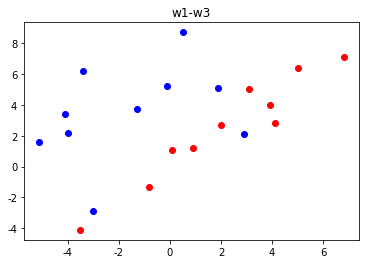

acc: 1.0
e:
[[ 0.01228558]
 [-0.32853785]
 [ 0.00828874]
 [ 0.01031623]
 [ 0.00917616]
 [ 0.00454559]
 [ 0.00471684]
 [ 0.00359158]
 [ 0.01281359]
 [ 0.00679508]
 [ 0.00051573]
 [-0.09596537]
 [ 0.00149195]
 [ 0.00162886]
 [ 0.00095866]
 [-0.17094952]
 [-0.004754  ]
 [ 0.00356332]
 [ 0.00443171]
 [ 0.00307019]]
w2与w4分类迭代次数： 599


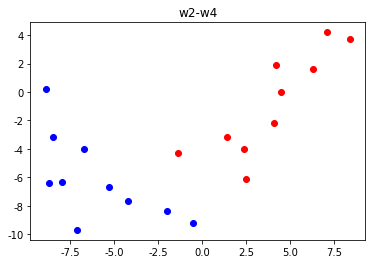

In [4]:
######################################################
###################   问题2    ########################
######################################################
y_21 = np.concatenate([y1, -y3], axis=1).T
y_22 = np.concatenate([y2, -y4], axis=1).T

a_21 = np.array([0, 0, 0])
a_22 = np.array([0, 0, 0])

b_21 = np.random.rand(y_21.shape[0], 1)
b_22 = np.random.rand(y_22.shape[0], 1)

iter_21, a_21 = train_hk(10000, 0.1, a_21, b_21, y_21)
print('w1与w3分类迭代次数：', iter_21)


plt.title('w1-w3')
plt.scatter(y1[0, :], y1[1, :], c='red')
plt.scatter(y3[0, :], y3[1, :], c='blue')
plt.show()

iter_22, a_22 = train_hk(10000, 0.1, a_22, b_22, y_22)
print('w2与w4分类迭代次数：', iter_22)

plt.title('w2-w4')
plt.scatter(y2[0, :], y2[1, :], c='red')
plt.scatter(y4[0, :], y4[1, :], c='blue')
plt.show()

In [5]:
######################################################
###################   问题3    ########################
######################################################
X12 = np.concatenate([y1[:, 0:8], y2[:, 0:8]], axis=1)
X34 = np.concatenate([y3[:, 0:8], y4[:, 0:8]], axis=1)
X = np.concatenate([X12, X34], axis=1)

Y12 = np.concatenate([y1[:, 8:10], y2[:, 8:10]], axis=1)
Y34 = np.concatenate([y3[:, 8:10], y4[:, 8:10]], axis=1)
Y = np.concatenate([Y12, Y34], axis=1)

y=np.zeros((4,4*8))
for i in range (4):
    for j in range(8):
        y[i,8*i+j]=1

yp=np.zeros((4,4*2))
for i in range (4):
    for j in range(2):
        yp[i,2*i+j]=1

la=0.0000005
W=np.linalg.inv(X.dot(X.T)+la*np.eye(3)).dot(X).dot(y.T)
y_p=np.argmax(np.dot(W.T,Y),axis=0)
yp=np.argmax(yp,axis=0)
sum=0
for i in range(len(y_p)):
    if(y_p[i]==yp[i]):
        sum+=1
print('acc:',sum/len(yp))
print('finsh')




acc: 1.0
finsh
